Exercise A

In [13]:
import numpy as np

In [14]:
def cooling_scheme(k):
    return 1 / np.sqrt(1 + k)

In [15]:
def initialize_route_fixed_start(n):
    route = np.random.permutation(range(1, n))  
    return np.concatenate(([0], route, [0]))

In [16]:
def compute_costs(points):
    n = len(points)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = np.linalg.norm(np.array(points[i]) - np.array(points[j]))
    return A

In [17]:
def compute_energy(A, path):
    cost = 0
    for element in range(len(path) - 1):
        cost = cost + A[path[element], path[element + 1]]

    return cost


In [18]:
def simulated_annealing(A, num_iter, path_init):

    X = path_init
    cost = np.zeros(num_iter)
    for k in range(num_iter):

        T = cooling_scheme(k)
        Y = initialize_route_fixed_start(A.shape[0])

        diff_energy = compute_energy(A, Y) - compute_energy(A, X)

        u = np.random.uniform(0, 1)
        if diff_energy <= 0:
            X = Y
        elif u < np.exp( - diff_energy / T):
            X = Y

        cost[k] = compute_energy(A, X)

    return X , cost


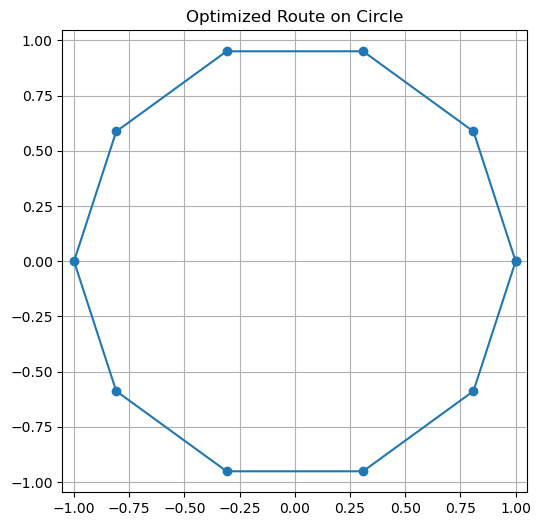

In [19]:
import matplotlib.pyplot as plt
import numpy as np

n_stations = 10

# Generate coordinates on a unit circle
angles = np.linspace(0, 2 * np.pi, n_stations, endpoint=False)
circle_points = np.array([(np.cos(a), np.sin(a)) for a in angles])

cost_matrix = compute_costs(circle_points)


path_init = initialize_route_fixed_start(n_stations)

# Unpack the two outputs directly
optimized_path, _ = simulated_annealing(cost_matrix, num_iter=1000000, path_init=path_init)
optimized_path = np.array(optimized_path, dtype=int)

# Plot the result
plt.figure(figsize=(6, 6))
ordered_points = circle_points[optimized_path]
plt.plot(ordered_points[:, 0], ordered_points[:, 1], '-o')
plt.title("Optimized Route on Circle")
plt.axis('equal')
plt.grid(True)
plt.show()


In [20]:
# Main
# np.random.seed(42)

num_points = 10
points = [[np.random.rand(), np.random.rand()] for _ in range(num_points)]
A = compute_costs(points)
n = len(points)

path_init = initialize_route_fixed_start(n)
num_iter = 500000

print("Initial path:", path_init)
best_path, cost = simulated_annealing(A, num_iter, path_init)
print("Best path found:", best_path)
print("Total cost:", compute_energy(A, best_path))

Initial path: [0 4 1 3 6 7 2 5 8 9 0]
Best path found: [0 6 3 2 7 9 5 4 1 8 0]
Total cost: 2.699885066838668


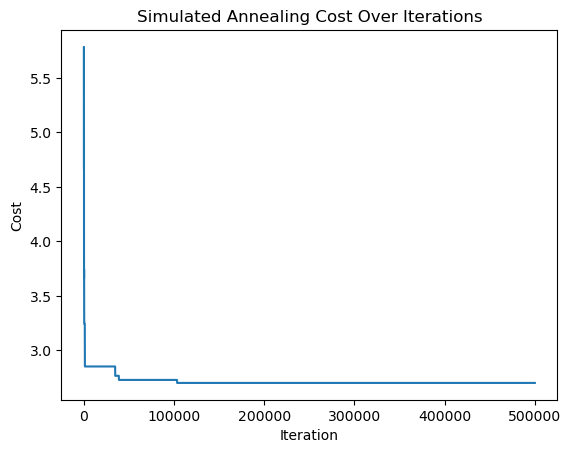

In [21]:
import matplotlib.pyplot as plt

plt.plot(cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Simulated Annealing Cost Over Iterations')
plt.show()

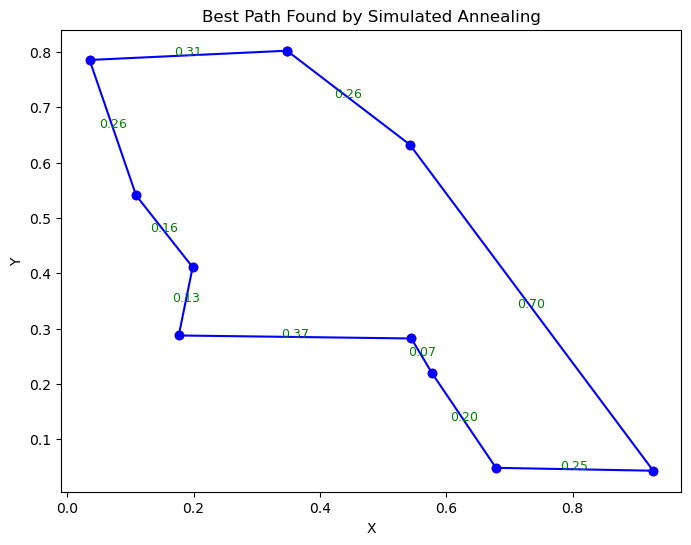

In [22]:
x = [points[i][0] for i in best_path]
y = [points[i][1] for i in best_path]

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.scatter([points[i][0] for i in range(n)], [points[i][1] for i in range(n)], color='red')

# Annotate each segment with its cost
for i in range(len(best_path) - 1):
    x_mid = (points[best_path[i]][0] + points[best_path[i+1]][0]) / 2
    y_mid = (points[best_path[i]][1] + points[best_path[i+1]][1]) / 2
    cost_val = A[best_path[i], best_path[i+1]]
    plt.text(x_mid, y_mid, f"{cost_val:.2f}", color='green', fontsize=9, ha='center')

plt.title('Best Path Found by Simulated Annealing')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Exercise B

In [23]:
import pandas as pd

A = np.array(pd.read_csv('cost.csv'))

path_init = initialize_route_fixed_start(A.shape[0])
num_iter = 100000

print("Initial path:", path_init)
best_path, cost = simulated_annealing(A, num_iter, path_init)
print("Best path found:", best_path)
print("Total cost:", compute_energy(A, best_path))

Initial path: [ 0  6 16 13  5 11  9  3 14 12  4 17  8 15  1  2  7 10 18  0]
Best path found: [ 0 13 18  5  6 15 10 12  3  7  8  4 11 17  1 16 14  9  2  0]
Total cost: 922


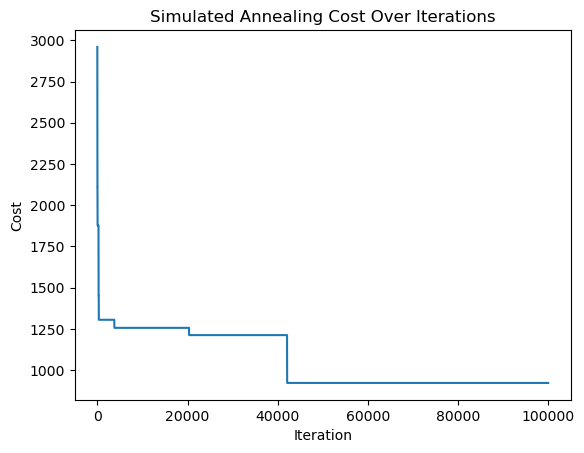

In [24]:
plt.plot(cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Simulated Annealing Cost Over Iterations')
plt.show()